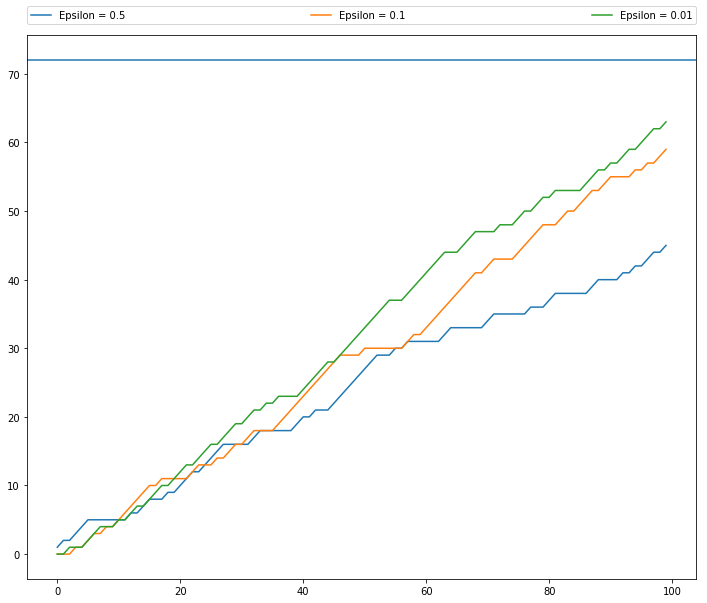

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

np.random.seed(1)

class Bandit:
    def __init__(self, arms):
        self.arm_count = arms
        self.truth = st.uniform.rvs(size=arms)
        self.visits = np.zeros(arms)
        self.totals = np.zeros(arms)
        self.means = np.zeros(arms)
        self.visits = np.zeros(arms)
            
    def sample(self, arm):
        self.visits[arm] += 1
        random = np.random.uniform()
        if random < self.truth[arm]:
            reward = 1
        else:
            reward = 0
        self.totals[arm] += reward
        self.means[arm] = self.totals[arm]/self.visits[arm]
        return reward
        
class Epsilon:
    def __init__(self, epsilon, bandit):
        self.epsilon = epsilon
        self.bandit = bandit
        self.reward = 0
        self.rewards = []
        
    def choose(self):
        random = np.random.uniform()
        if random < self.epsilon:
            arm = np.random.choice(list(range(self.bandit.arm_count)))
        else:
            arm = np.argmax(self.bandit.means)
        self.reward += self.bandit.sample(arm)
        self.rewards.append(self.reward)

mab = Bandit(3)
explorer1 = Epsilon(0.9, mab)
explorer2 = Epsilon(0.5, mab)
explorer3 = Epsilon(0.001, mab)
explorers = [explorer1, explorer2, explorer3]
rewards = []
runs = 100
for explorer in explorers:
    for i in range(runs):
        explorer.choose()
    

plt.figure(figsize=(12,10))
plt.plot(explorer1.rewards, label='Epsilon = 0.5')
plt.plot(explorer2.rewards, label='Epsilon = 0.1')
plt.plot(explorer3.rewards, label='Epsilon = 0.01')
plt.axhline(y=np.max([mab.truth])*runs, line)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=3, mode="expand", borderaxespad=0.)